# Minimum Temperature Trends at Sondrestrom, GL

The following is an analysis of the maximum temperature trends reported at a weather station on the Southwest coast of Greenland. I chose this site to study for two reasons. First, because the Greenland ice sheet is of critical importance to the Earth's systems. Increased warming here could result in the melting of the Greenland ice sheet, which would cause sea level rise and potentially a shutdown of the Gulf Stream, an oceanic current which distributes heat around the globe. The second reason I chose this site is for its location at a far Northern latitude. Warming trends are amplified closer to the poles, so it might be easier to observe them in far North. I studied the minimum temperature, because this will show us how many days out of the year had a temperature below freezing. 

This station is near the coast, about 50m above sea level. Ideally I would have liked to have found data from a station further inland on or near the ice sheet, where the temperature influence of the ocean would also be less important. However, I couldn't find any stations with current data located away from the coast.

In [62]:
import pandas as pd
import holoviews as hv
import hvplot.pandas


In [84]:
greenland_url = (
    'https://www.ncei.noaa.gov/access/services/da'f'ta/v1'
    '?dataset=daily-summaries'
    '&dataTypes=TMIN,PRCP,TMAX'
    '&stations=GLW00016504'
    '&units=standard'
    '&startDate=1947-10-01'
    '&endDate=2024-09-18')
greenland_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMIN,PRCP,TMAX&stations=GLW00016504&units=standard&startDate=1947-10-01&endDate=2024-09-18'

In [85]:
# Import data into Python from NCEI API
greenland_climate_df = pd.read_csv(
    greenland_url,
    index_col='DATE',
    parse_dates=True)
greenland_climate_df

,STATION,PRCP,TMAX,TMIN
DATE,,,,
1947-11-22,GLW00016504,0.00,-3.0,-7.0
1947-12-05,GLW00016504,0.00,-1.0,-8.0
1949-01-01,GLW00016504,0.00,9.0,-19.0
1949-01-02,GLW00016504,0.06,10.0,-2.0
1949-01-03,GLW00016504,0.04,11.0,-10.0
...,...,...,...,...
2020-12-28,GLW00016504,NaN,47.0,8.0
2020-12-29,GLW00016504,NaN,31.0,17.0
2020-12-30,GLW00016504,NaN,34.0,23.0


In [86]:
greenland_climate_df = greenland_climate_df[['PRCP', 'TMIN', 'TMAX']]
greenland_climate_df

,PRCP,TMIN,TMAX
DATE,,,
1947-11-22,0.00,-7.0,-3.0
1947-12-05,0.00,-8.0,-1.0
1949-01-01,0.00,-19.0,9.0
1949-01-02,0.06,-2.0,10.0
1949-01-03,0.04,-10.0,11.0
...,...,...,...
2020-12-28,NaN,8.0,47.0
2020-12-29,NaN,17.0,31.0
2020-12-30,NaN,23.0,34.0


<Axes: xlabel='DATE'>

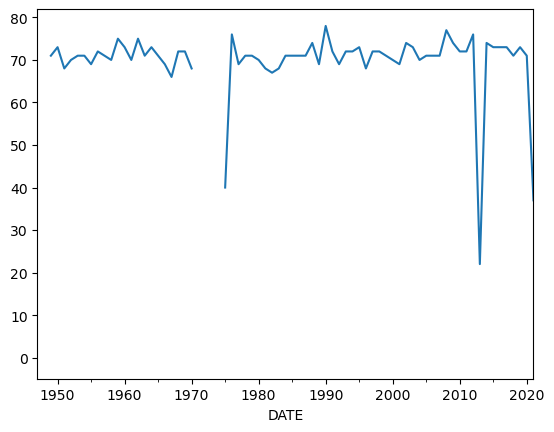

In [91]:
#greenland_climate_df.TMIN.resample('YS').max().plot()
#greenland_climate_df.PRCP.plot()
greenland_climate_df.TMAX.resample('YS').max().plot()

In [67]:
# store the df for later use.

%store greenland_climate_df

Stored 'greenland_climate_df' (DataFrame)


<Axes: ylabel='Frequency'>

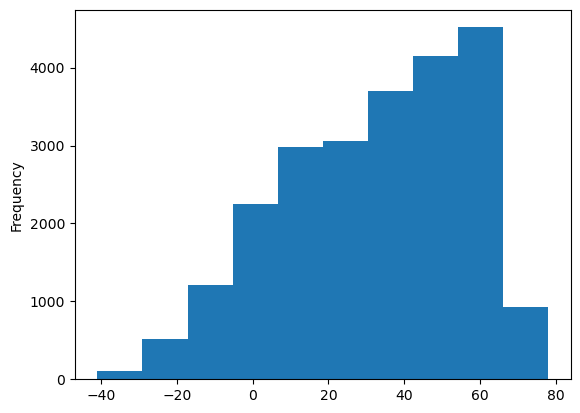

In [92]:
greenland_climate_df.TMAX.plot.hist()

In [93]:
# define a new dataframe, renaming the columns to include correct units.

greenland_climate_df_u = greenland_climate_df.rename(columns={
    'TMAX': 'TMAX_F',
})

greenland_climate_df_u

,PRCP,TMIN,TMAX_F
DATE,,,
1947-11-22,0.00,-7.0,-3.0
1947-12-05,0.00,-8.0,-1.0
1949-01-01,0.00,-19.0,9.0
1949-01-02,0.06,-2.0,10.0
1949-01-03,0.04,-10.0,11.0
...,...,...,...
2020-12-28,NaN,8.0,47.0
2020-12-29,NaN,17.0,31.0
2020-12-30,NaN,23.0,34.0


In [95]:
# define the df as a function that converts Farenheit to Celsius.

#greenland_climate_df_u['TMIN_C'] = (greenland_climate_df_u['TMIN_F']-32)*5/9
greenland_climate_df_u['TMAX_C'] = (greenland_climate_df_u['TMAX_F']-32)*5/9
greenland_climate_df_u

,PRCP,TMIN,TMAX_F,TMAX_C
DATE,,,,
1947-11-22,0.00,-7.0,-3.0,-19.444444
1947-12-05,0.00,-8.0,-1.0,-18.333333
1949-01-01,0.00,-19.0,9.0,-12.777778
1949-01-02,0.06,-2.0,10.0,-12.222222
1949-01-03,0.04,-10.0,11.0,-11.666667
...,...,...,...,...
2020-12-28,NaN,8.0,47.0,8.333333
2020-12-29,NaN,17.0,31.0,-0.555556
2020-12-30,NaN,23.0,34.0,1.111111


In [96]:
greenland_climate_df = greenland_climate_df_u[['TMAX_C']]
greenland_climate_df

,TMAX_C
DATE,
1947-11-22,-19.444444
1947-12-05,-18.333333
1949-01-01,-12.777778
1949-01-02,-12.222222
1949-01-03,-11.666667
...,...
2020-12-28,8.333333
2020-12-29,-0.555556
2020-12-30,1.111111


<Axes: title={'center': 'Maximum Temperature in Sondrestrom over Time'}, xlabel='Date', ylabel='Maximum Temperature (C)'>

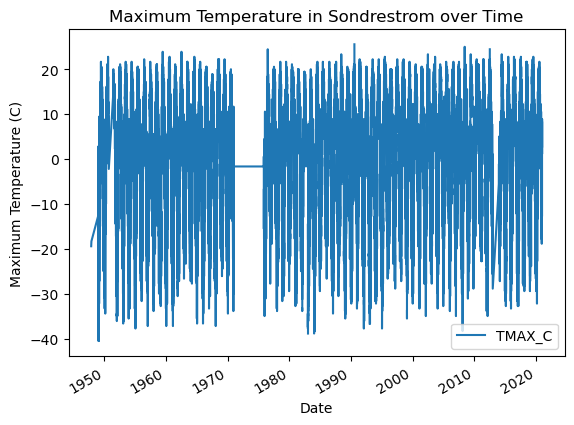

In [97]:
# Plot the data using .plot
# greenland_climate_df.plot(
#     y='PRCP',
#     title='Precipitation in Sondrestrom over Time',
#     xlabel='Date',
#     ylabel='Precipitation (in.)')
# Plot the data using .plot
greenland_climate_df.plot(
    y='TMAX_C',
    title='Maximum Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Maximum Temperature (C)')

In [98]:
gl_ann_climate_df = greenland_climate_df.resample('YS').mean()
gl_ann_climate_df

,TMAX_C
DATE,
1947-01-01,-18.888889
1948-01-01,NaN
1949-01-01,-3.070015
1950-01-01,1.064306
1951-01-01,3.009024
...,...
2017-01-01,1.192449
2018-01-01,-0.575342
2019-01-01,2.750230


<Axes: title={'center': 'Average Annual Maximum Temperature in Sondrestrom over Time'}, xlabel='Date', ylabel='Temperature ($^\\circ$C)'>

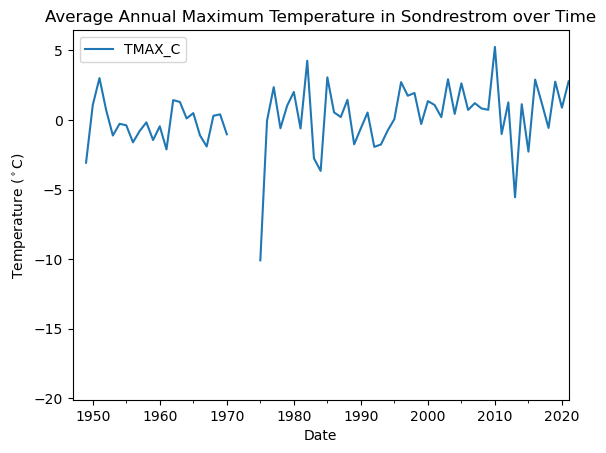

In [99]:
# Plot the annual data
gl_ann_temp_plot = gl_ann_climate_df.plot(
    y='TMAX_C',
    title='Average Annual Maximum Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Temperature ($^\circ$C)')
gl_ann_temp_plot

###Observations about the data:
*There's a gap in the data from 1970-1975
*There appear to be anomalously low temperatures recorded in 1975. These could be a result of anomalously cold weather patterns, or they could be a result of data collection errors.

In [100]:
# Plot the annual data interactively
temp_interactive_plot = gl_ann_climate_df.hvplot(
    y='TMAX_C',
    title='Average Annual Maximum Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Temperature (Degrees Celsius)')
temp_interactive_plot

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [DATE]   (TMAX_C)